# A09 - [Project: Street or Road?](https://dtkaplan.github.io/DataComputingEbook/project-street-or-road.html#project-street-or-road)
Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

---

```{admonition} Revised
20 Jun 2023
```
```{contents}
```

---

## Programming Environment

In [1]:
library(lubridate)
library(rvest)
library(tidyverse)

str_c('EXECUTED : ', now())
sessionInfo()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.2     ✔ readr   2.1.4
✔ forcats 1.0.0     ✔ stringr 1.5.0
✔ ggplot2 3.4.2     ✔ tibble  3.2.1
✔ purrr   1.0.1     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "EXECUTED : 2023-06-21 15:05:05.683525"

R version 4.3.0 (2023-04-21)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_1.0.0   stringr_1.5.0   dplyr_1.1.2     purrr_1.0.1    
 [5] readr_2.1.4     tidyr_1.3.0     tibble_3.2.1    ggplot2_3.4.2  
 [9] tidyverse_2.0.0 rvest_1.0.3     lubridate_1.9.2

loaded via a namespace (and not attached):
 [1] gtable_0.3.3     jsonlite_1.8.5   compiler_4.3.0   crayon_1.5.2    
 [5] tidyselect_1.2.0 IRdisplay_1.1    xml2_1.3.4       scales_1.2.1    
 [9] uuid_1.1-0       fastma

---

## Example

People's addresses involve streets, lanes, courts, avenues, and so on. How many such road-related words are in common use? In answering this question, you would presumably want to look at lots of addresses and extract the road-related term. You could do this by eye, reading down a list of a few hundred or thousand addresses. But if you want to do it on a really large scale, a city or state or country, you would want some automated help, for instance, a computer program that discards the sorts of entries you have already identified to give a greater concentration of unidentified terms. In this activity, you're going to build such a program.

In [2]:
# about 15,000 street addresses of registered voters in Wake County, NC
Addresses <- read_csv('https://mdbeckman.github.io/dcSupplement/data/street-addresses.csv')
head(Addresses)

Rows: 15483 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): address

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


address
<chr>
2117 MARINER CIRCLE
101 EPPING WAY
PO BOX 58592
5102 ECHO RIDGE RD
PO BOX 37218
PO BOX 37218


In [3]:
# about 900,000 medicare service provider street addresses
download.file(url      = 'https://mdbeckman.github.io/dcSupplement/data/CMS_ProvidersSimple.rds',
              destfile = 'CMS_ProvidersSimple.rds')
DataTable <- readRDS('CMS_ProvidersSimple.rds')
head(DataTable)

,address,first_name,sex
,<chr>,<chr>,<chr>
1,900 SETON DR,ARDALAN,M
2,2650 RIDGE AVE,THOMAS,M
3,4126 N HOLLAND SYLVANIA RD,RASHID,M
4,456 MAGEE AVE,DAVID,M
5,11100 EUCLID AVE,JENNIFER,F
6,12605 E 16TH AVE,KEVIN,M


To solve such problems, start by looking at a few dozen of the addresses to familiarize yourself with common patterns. Suppose you wanted to extract the PO Box number from an address. Read the street address data and pull out a sample of a few dozen cases.
1. In everyday langauge, describe a pattern that you think will identify the information you are looking for.
    * The PO Box cases tend to have a substring 'PO'.
2. Translate (1) into the form of a regular expression.
    * The regular expression for 'PO' is simply 'PO'.
3. Filter to retain the cases that match the expression. Hint: `filter()` and `grepl()` are useful for this.
4. Filter to retain the cases that do not match the expression.
5. Examine the results of (3) and (4) to identify shortcomings in your patterns.
6. Improve or extend the pattern to deal with the mistaken cases.
7. Repeat until satisfied.
8. Put extraction parentheses around the parts of the regular expression that contain the info you want.

In [4]:
Sample <-
  Addresses %>%
    sample_n(size = 50)
head(Sample)

pattern <- 'PO'

Matches <-
  Sample %>%
    filter(grepl(pattern = pattern, address))
head(Matches)

Dont <-
  Sample %>%
    filter(!grepl(pattern = 'PO', address))
head(Dont)

pattern <- 'BOX\\s+(\\d+)'

Matches <-
  Sample %>%
    filter( grepl(pattern, address))
head(Matches)

Dont <-
  Sample %>%
    filter(!grepl(pattern, address))
head(Dont)

BoxNumbers <-
  Sample %>%
    filter(grepl(pattern, address)) %>%
    tidyr::extract(address, into = 'boxnum', regex = pattern)
head(BoxNumbers)

address
<chr>
PO BOX 293
9800 LORELEI LANE NE
SEBTS BOX BO-26-A
NCSU BOX 22714
301 SYCAMORE ST
722 LENOR PLACE CIR


address
<chr>
PO BOX 293
PO BOX 372
PO BOX 1011
PO BOX 20765
PO BOX 371
PO BOX 1294


address
<chr>
9800 LORELEI LANE NE
SEBTS BOX BO-26-A
NCSU BOX 22714
301 SYCAMORE ST
722 LENOR PLACE CIR
NCSU BOX 15007


address
<chr>
PO BOX 293
NCSU BOX 22714
PO BOX 372
PO BOX 1011
PO BOX 20765
NCSU BOX 15007


address
<chr>
9800 LORELEI LANE NE
SEBTS BOX BO-26-A
301 SYCAMORE ST
722 LENOR PLACE CIR
BARTON COLLEGE
6041 SILKWATER COURT


boxnum
<chr>
293
22714
372
1011
20765
15007


In [5]:
pattern <- 'PO'

Matches <-
  Addresses %>%
    filter(grepl(pattern = pattern, address))
head(Matches)

Dont <-
  Addresses %>%
    filter(!grepl(pattern = 'PO', address))
head(Dont)

pattern <- 'BOX\\s+(\\d+)'

Matches <-
  Addresses %>%
    filter( grepl(pattern, address))
head(Matches)

Dont <-
  Addresses %>%
    filter(!grepl(pattern, address))
head(Dont)

BoxNumbers <-
  Addresses %>%
    filter(grepl(pattern, address)) %>%
    tidyr::extract(address, into = 'boxnum', regex = pattern)
head(BoxNumbers)

address
<chr>
PO BOX 58592
PO BOX 37218
PO BOX 37218
PO BOX 1953
PO BOX 132
PO BOX 360


address
<chr>
2117 MARINER CIRCLE
101 EPPING WAY
5102 ECHO RIDGE RD
5007 PURITAN RD
04-I ROBIN CIRCLE
4800 WESTERN BLVD


address
<chr>
PO BOX 58592
PO BOX 37218
PO BOX 37218
PO BOX 1953
PO BOX 132
PO BOX 360


address
<chr>
2117 MARINER CIRCLE
101 EPPING WAY
5102 ECHO RIDGE RD
5007 PURITAN RD
04-I ROBIN CIRCLE
4800 WESTERN BLVD


boxnum
<chr>
58592
37218
37218
1953
132
360


## Back to the Streets

Street endings (e.g., 'ST', 'LANE') are often found at the end of the address string. Use this as a starting point to find the most common endings. Once you have a set of specific street endings, you can use the regex "or" symbol, e.g., '(ST|RD|ROAD)'. The parentheses are not incidental. They are there to mark a pattern that you want to extract. In this case, in addition to knowing that there is a ST or RD or ROAD in an address, you want to know which one of those possibilities it is so that you can count the occurrence of each of the possibilities. To find street endings that aren't in your set, you can filter out the street endings or non street addresses you already know about.

[1] Read the following R statements. Next to each line, give a short explanation of what the line contributes to the task. For each of the regexes, explain in simple everyday language what pattern is being matched.

```r
pattern <- '(ST|RD|ROAD)'

LeftOvers <-
  Addresses %>%
    filter(
      !grepl(pattern, address),                 # matches other than: 'ST' or 'RD' or 'ROAD'
      !grepl('\\sAPT|UNIT\\s[\\d]+$', address), # matches other than: (1 whitespace, 'APT') or ('UNIT', 1 whitespace, 1 or more digits at the end of the string)
      !grepl(' BOX ', address)                  # matches other than: 1 space, 'BOX', 1 space
    )
LeftOvers
```

[2] For each set of patterns that you identify, compute the `LeftOvers`. Examine them visually to find new street endings to add to the pattern, e.g., LANE. When you have this working on the small sample, use a larger sample and, eventually, the whole data set. It's practically impossible to find a method that will work perfectly on new data, but do the best you can. In your report, implement your method and explain how it works, line by line. Present your result: how many addresses there are of each kind of road word?

'DR', 'RD', and 'ST' are the most common street types. In general, abbrviated street types are more common than their longform counterparts.

Breaking addresses into their components is a common task. People who work on this problem intensively sometimes publish their regular expressions. Here's one from Ross Hammer published at https://regexlib.com/Search.aspx?k=street:

```
^\s*((?:(?:\d+(?:\x20+\w+\.?)+(?:(?:\x20+STREET|ST|DRIVE|DR|AVENUE|AVE|ROAD|RD|LOOP|COURT
|CT|CIRCLE|LANE|LN|BOULEVARD|BLVD)\.?)?)|(?:(?:P\.\x20?O\.|P\x20?O)\x20*Box\x20+\d+)|
(?:General\x20+Delivery)|(?:C[\\\/]O\x20+(?:\w+\x20*)+))\,?\x20*(?:(?:(?:APT|BLDG|DEPT|
FL|HNGR|LOT|PIER|RM|S(?:LIP|PC|T(?:E|OP))|TRLR|UNIT|\x23)\.?\x20*(?:[a-zA-Z0-9\-]+))|
(?:BSMT|FRNT|LBBY|LOWR|OFC|PH|REAR|SIDE|UPPR))?)\,?\s+((?:(?:\d+(?:\x20+\w+\.?)+
(?:(?:\x20+STREET|ST|DRIVE|DR|AVENUE|AVE|ROAD|RD|LOOP|COURT|CT|CIRCLE|LANE|LN|BOULEVARD|
BLVD)\.?)?)|(?:(?:P\.\x20?O\.|P\x20?O)\x20*Box\x20+\d+)|(?:General\x20+Delivery)|
(?:C[\\\/]O\x20+(?:\w+\x20*)+))\,?\x20*(?:(?:(?:APT|BLDG|DEPT|FL|HNGR|LOT|PIER|RM|
S(?:LIP|PC|T(?:E|OP))|TRLR|UNIT|\x23)\.?\x20*(?:[a-zA-Z0-9\-]+))|(?:BSMT|FRNT|LBBY|
LOWR|OFC|PH|REAR|SIDE|UPPR))?)?\,?\s+((?:[A-Za-z]+\x20*)+)\,\s+(A[LKSZRAP]|C[AOT]|
D[EC]|F[LM]|G[AU]|HI|I[ADLN]|K[SY]|LA|M[ADEHINOPST]|N[CDEHJMVY]|O[HKR]|P[ARW]|RI|
S[CD]|T[NX]|UT|V[AIT]|W[AIVY])\s+(\d+(?:-\d+)?)\s*$
```

In [6]:
Addresses %>%
  filter(
    !grepl(pattern = ' AVENUE |AVENUE$', x = address),       # matches other than: 'AVENUE' flanked by whitespace anywhere in the string, or 'AVENUE' at the end of the string
    !grepl(pattern = ' AVE |AVE$', x = address),             # matches other than: 'AVE' flanked by whitespace anywhere in the string, or 'AVE' at the end of the string
    !grepl(pattern = ' BLVD |BLVD$', x = address),           # matches other than: 'BLVD' flanked by whitespace anywhere in the string, or 'BLVD' at the end of the string
    !grepl(pattern = ' BOULEVARD |BOULEVARD$', x = address), # matches other than: 'BOULEVARD' flanked by whitespace anywhere in the string, or 'BOULEVARD' at the end of the string
    !grepl(pattern = ' CIR |CIR$', x = address),             # matches other than: 'CIR' flanked by whitespace anywhere in the string, or 'CIR' at the end of the string
    !grepl(pattern = ' CIRCLE |CIRCLE$', x = address),       # matches other than: 'CIRCLE' flanked by whitespace anywhere in the string, or 'CIRCLE' at the end of the string
    !grepl(pattern = ' CT |CT$', x = address),               # matches other than: 'CT' flanked by whitespace anywhere in the string, or 'CT' at the end of the string
    !grepl(pattern = ' COURT |COURT$', x = address),         # matches other than: 'COURT' flanked by whitespace anywhere in the string, or 'COURT' at the end of the string
    !grepl(pattern = ' DR |DR$', x = address),               # matches other than: 'DR' flanked by whitespace anywhere in the string, or 'DR' at the end of the string
    !grepl(pattern = ' DRIVE |DRIVE$', x = address),         # matches other than: 'DRIVE' flanked by whitespace anywhere in the string, or 'DRIVE' at the end of the string
    !grepl(pattern = ' LN |LN$', x = address),               # matches other than: 'LN' flanked by whitespace anywhere in the string, or 'LN' at the end of the string
    !grepl(pattern = ' LANE |LANE$', x = address),           # matches other than: 'LANE' flanked by whitespace anywhere in the string, or 'LANE' at the end of the string
    !grepl(pattern = ' PL |PL$', x = address),               # matches other than: 'PL' flanked by whitespace anywhere in the string, or 'PL' at the end of the string
    !grepl(pattern = ' PLACE |PLACE$', x = address),         # matches other than: 'PLACE' flanked by whitespace anywhere in the string, or 'PLACE' at the end of the string
    !grepl(pattern = ' RD |RD$', x = address),               # matches other than: 'RD' flanked by whitespace anywhere in the string, or 'RD' at the end of the string
    !grepl(pattern = ' ROAD |ROAD$', x = address),           # matches other than: 'ROAD' flanked by whitespace anywhere in the string, or 'ROAD' at the end of the string
    !grepl(pattern = ' ST |ST$', x = address),               # matches other than: 'ST' flanked by whitespace anywhere in the string, or 'ST' at the end of the string
    !grepl(pattern = ' STREET |STREET$', x = address),       # matches other than: 'STREET' flanked by whitespace anywhere in the string, or 'STREET' at the end of the string
    !grepl(pattern = ' TRAIL |TRAIL$', x = address),         # matches other than: 'TRAIL' flanked by whitespace anywhere in the string, or 'TRAIL' at the end of the string
    !grepl(pattern = ' WAY |WAY$', x = address),             # matches other than: 'WAY' flanked by whitespace anywhere in the string, or 'WAY' at the end of the string
    !grepl(pattern = ' WINERY |WINERY$', x = address),       # matches other than: 'WINERY' flanked by whitespace anywhere in the string, or 'WINERY' at the end of the string
    !grepl(pattern = 'BOX\\s+(\\d+)', x = address)           # filters out all the 'BOX' from above
  )

address
<chr>
NCSU B0X 15637
HMIA-267
1104 PULLEN HALL
311 BAREFOOT
512 LIVE OAK
1706 WINGATE UNIVERSITY
121 CRESTVIEW TER
AT BN BRAVO CO
901 ENGLEWOOD PKWY APT L 107


In [97]:
pattern <- '\\s+('
pattern <- str_c(pattern, 'AVE|AVENUE')
pattern <- str_c(pattern, '|BLVD|BOULEVARD')
pattern <- str_c(pattern, '|CIR|CIRCLE')
pattern <- str_c(pattern, '|CT|COURT')
pattern <- str_c(pattern, '|DR|DRIVE')
pattern <- str_c(pattern, '|LN|LANE')
pattern <- str_c(pattern, '|PL|PLACE')
pattern <- str_c(pattern, '|RD|ROAD')
pattern <- str_c(pattern, '|ST|STREET')
pattern <- str_c(pattern, '|TRAIL')
pattern <- str_c(pattern, '|WAY')
pattern <- str_c(pattern, '|WINERY')
pattern <- str_c(pattern, ')(\\s+|$)?')
pattern

streets <-
  Addresses %>%
    filter(
      grepl(x = address, pattern = pattern, ignore.case = TRUE)
    ) %>%
    tidyr::extract(
      col   = address,
      regex = pattern,
      into  = c(
        'street',
        ' '
      )
    ) %>%
    group_by(street) %>%
    summarize(total = n()) %>%
    arrange(desc(total))
streets

[1] "\\s+(AVE|AVENUE|BLVD|BOULEVARD|CIR|CIRCLE|CT|COURT|DR|DRIVE|LN|LANE|PL|PLACE|RD|ROAD|ST|STREET|TRAIL|WAY|WINERY)(\\s+|$)?"

street,total
<chr>,<int>
DR,888
RD,688
ST,676
AVE,259
CT,229
ROAD,188
LN,152
PL,145
LANE,141


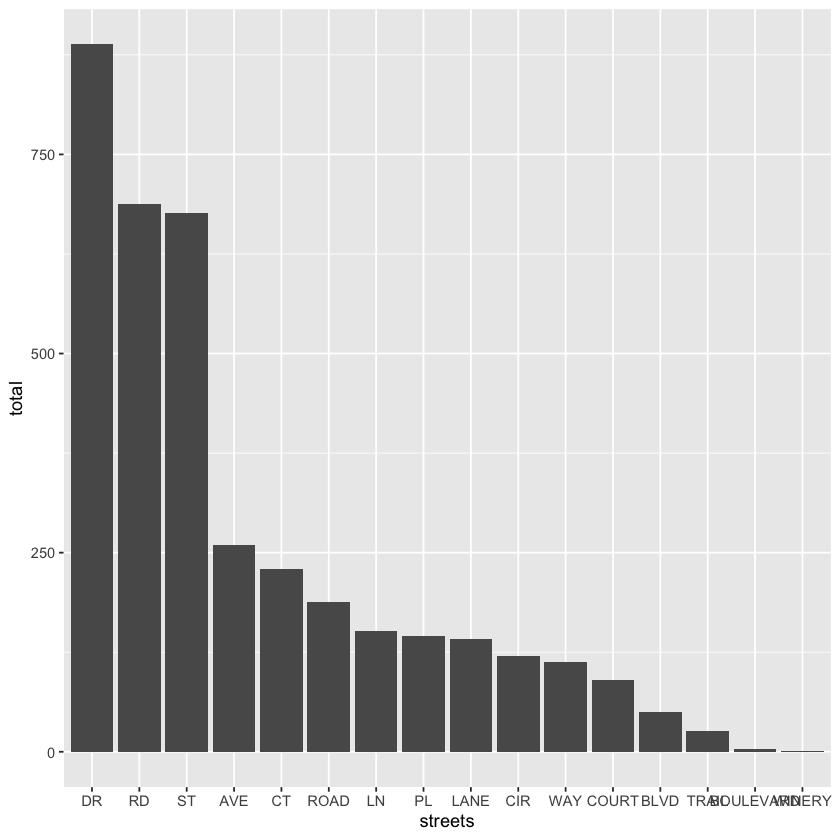

In [99]:
streets %>%
  ggplot(aes(x = reorder(street, -total), y = total)) +
    geom_col() +
    xlab('streets')

---